Machine Learning Homework 0 Bryce Readyhough ID: 801005029

Starting by loading in the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Loading in the data from the provided CSV. The CSV is formatted so the first column is independent variable 1 (X1), the second is independent variable 2 (X2), the third is independent variable 3 (X3) and the fourth is the dependent variable (Y).

In [2]:
csv = pd.read_csv('D3.csv')
numRows = len(csv)
print(numRows)
csv.head(numRows)

99


,0.0,3.4399999999999999,0.44000000000000039,4.387545011044053
0,0.040404,0.134949,0.888485,2.679650
1,0.080808,0.829899,1.336970,2.968490
2,0.121212,1.524848,1.785455,3.254065
3,0.161616,2.219798,2.233939,3.536375
4,0.202020,2.914747,2.682424,3.815420
...,...,...,...,...
94,3.838384,1.460202,3.046061,-4.440595
95,3.878788,2.155152,3.494545,-4.458663
96,3.919192,2.850101,3.943030,-4.479995
97,3.959596,3.545051,0.391515,-3.304593


Each of the columns is then split into seperate 1,numRows matrices

In [3]:
X1 = csv.values[:,0]
X2 = csv.values[:,1]
X3 = csv.values[:,2]
Y = csv.values[:,3]
numTraining = len(Y)
print('There are ', numTraining, ' training examples.')

#Printing the first 5 records of each matrix
print('X1 = ', X1[: 5])
print('X2 = ', X2[: 5])
print('X3 = ', X3[: 5])
print('Y = ', Y[: 5])

There are  99  training examples.
X1 =  [0.04040404 0.08080808 0.12121212 0.16161616 0.2020202 ]
X2 =  [0.13494949 0.82989899 1.52484848 2.21979798 2.91474747]
X3 =  [0.88848485 1.3369697  1.78545455 2.23393939 2.68242424]
Y =  [2.6796499  2.96848981 3.25406475 3.53637472 3.81541972]


Defining a function to make drawing the scatter plots for each independent variable quicker

In [4]:
def drawScatterPlot (Xfunc, Yfunc, setNum):
    plt.scatter(Xfunc, Yfunc, color='blue', marker='*')
    plt.grid()
    plt.rcParams["figure.figsize"] = (10,6)
    plt.xlabel('Independent variable X' + setNum)
    plt.ylabel('Dependent variable Y')
    plt.title('Plot of Independent variable ' + setNum + ' vs dependent variable Y')
    return

Using the above function to plot each independent variable

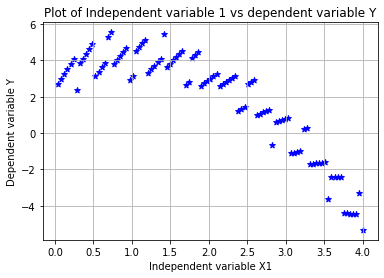

In [5]:
drawScatterPlot(X1, Y, '1')

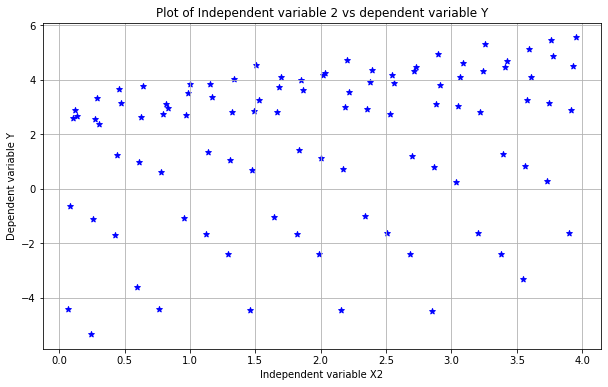

In [6]:
drawScatterPlot(X2, Y, '2')

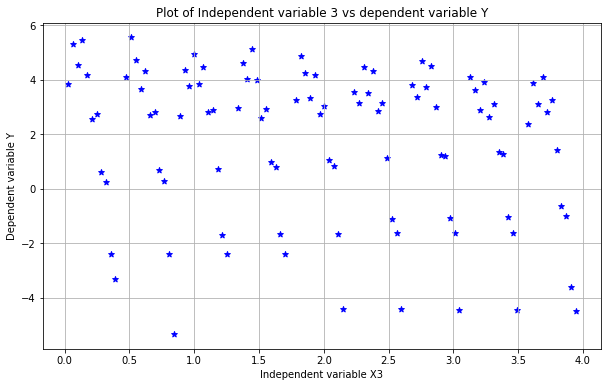

In [7]:
drawScatterPlot(X3, Y, '3')

Creating an Array of Ones to be used as the X0 value for each of the X values we have. This is required to use a dot product with theta later.

Each of the X values is then copied and made into a 2 dimensional array.

Lastly, each of the X values is combined with the array of 1s to make a matrix whos first column is all 1s and the second is the values for X.

In [8]:
#Independent Variable X1
X1_0 = np.ones((numTraining, 1))
X1_0[:5]

X1_1 = X1.reshape(numTraining, 1)
X1_1[:5]

X1 = np.hstack((X1_0, X1_1))
X1[:5]

array([[1.        , 0.04040404],
       [1.        , 0.08080808],
       [1.        , 0.12121212],
       [1.        , 0.16161616],
       [1.        , 0.2020202 ]])

In [9]:
#Independent Variable X2
X2_0 = np.ones((numTraining, 1))
X2_0[:5]

X2_1 = X2.reshape(numTraining, 1)
X2_1[:5]

X2 = np.hstack((X2_0, X2_1))
X2[:5]

array([[1.        , 0.13494949],
       [1.        , 0.82989899],
       [1.        , 1.52484848],
       [1.        , 2.21979798],
       [1.        , 2.91474747]])

In [10]:
#Independent Variable X1
X3_0 = np.ones((numTraining, 1))
X3_0[:5]

X3_1 = X3.reshape(numTraining, 1)
X3_1[:5]

X3 = np.hstack((X3_0, X3_1))
X3[:5]

array([[1.        , 0.88848485],
       [1.        , 1.3369697 ],
       [1.        , 1.78545455],
       [1.        , 2.23393939],
       [1.        , 2.68242424]])

Creating a vector to hold the values for theta0 and theta 1 for each of the X variables

In [11]:
thetaX1 = np.zeros(2)
thetaX2 = np.zeros(2)
thetaX3 = np.zeros(2)

Creating a function which computes the cost for a given array of X and Y values as well as a given theta0 and theta 1. The function outputs a scalar value for the cost.

In [12]:
def compute_cost(XVals, YVals, theta):
    predictions = XVals.dot(theta) #Makes a prediction using the given values of they using 
                                   #the following equation: prediction = theta0 + theta1*X
    errors = np.subtract(predictions, YVals) #calculates the error from the prediction to the actual Y value
    sqrErrors = np.square(errors) #squaring the errors to make finding the minimum easier
    J = 1/(2*numTraining) * np.sum(sqrErrors)
    
    return J

Computing the cost for the default values of theta for each independent variable

In [13]:
costX1 = compute_cost(X1, Y, thetaX1)
print('The cost for given values of thetaX1_0 and thetaX1_1 = ', costX1)

costX2 = compute_cost(X2, Y, thetaX3)
print('The cost for given values of thetaX2_0 and thetaX2_1 = ', costX2)

costX3 = compute_cost(X3, Y, thetaX3)
print('The cost for given values of thetaX3_0 and thetaX3_1 = ', costX3)

The cost for given values of thetaX1_0 and thetaX1_1 =  5.483015861682611
The cost for given values of thetaX2_0 and thetaX2_1 =  5.483015861682611
The cost for given values of thetaX3_0 and thetaX3_1 =  5.483015861682611


Creating a function which calculates the gradient descent for a given X, Y, thetaX0 thetaX1, alpha, and number of iterations.

In [14]:
def gradient_descent(XVals, YVals, theta, alpha, iterations):
    cost_history = np.zeros(iterations) #stores the calculated cost for each iteration of the algorithm
    for i in range(iterations):
        predictions = XVals.dot(theta) #tests the current theta value with each independent variable value
        errors = np.subtract(predictions, YVals)
        sum_delta = (alpha/numTraining) * XVals.transpose().dot(errors);
        theta = theta - sum_delta; #updating the value of theta based on the new data
        cost_history[i] = compute_cost(XVals, YVals, theta) #logging the cost to the cost history log
        
        
    return theta, cost_history    

In [15]:
iterations = 1500;
alpha = 0.1

Calculating the value of theta using gradient descent for each of the 3 independent variables. The above value of alpha and number of iterations was used for all 3 variables. The cost was computed once more using the final values of theta for each variable.

In [16]:
thetaX1, cost_history_X1 = gradient_descent(X1, Y, thetaX1, alpha, iterations)
print('Final value of theta with independent variable X1 = ', thetaX1)
print('The cost history for independent variable X1 = ', cost_history_X1)
final_Cost_X1 = compute_cost(X1, Y, thetaX1)
print('Calculated cost using the final value of theta for variable X1 = ', final_Cost_X1)
print('\n')

thetaX2, cost_history_X2 = gradient_descent(X2, Y, thetaX2, alpha, iterations)
print('Final value of theta with independent variable X2 = ', thetaX2)
print('The cost history for independent variable X2 = ', cost_history_X2)
final_Cost_X2 = compute_cost(X2, Y, thetaX2)
print('Calculated cost using the final value of theta for variable X2 = ', final_Cost_X2)
print('\n')

thetaX3, cost_history_X3 = gradient_descent(X3, Y, thetaX3, alpha, iterations)
print('Final value of theta with independent variable X3 = ', thetaX3)
print('The cost history for independent variable X3 = ', cost_history_X3)
final_Cost_X3 = compute_cost(X3, Y, thetaX3)
print('Calculated cost using the final value of theta for variable X3 = ', final_Cost_X3)
print('\n')

Final value of theta with independent variable X1 =  [ 5.99114009 -2.06191424]
The cost history for independent variable X1 =  [5.13668305 4.93756139 4.76604789 ... 0.98246683 0.98246683 0.98246683]
Calculated cost using the final value of theta for variable X1 =  0.9824668302221783


Final value of theta with independent variable X2 =  [0.75592882 0.53878239]
The cost history for independent variable X2 =  [3.93057836 3.6900397  3.65195822 ... 3.62015665 3.62015665 3.62015665]
Calculated cost using the final value of theta for variable X2 =  3.6201566450210745


Final value of theta with independent variable X3 =  [ 2.81356727 -0.50011833]
The cost history for independent variable X3 =  [4.63345925 4.46796219 4.41269659 ... 3.6503     3.6503     3.6503    ]
Calculated cost using the final value of theta for variable X3 =  3.650300000268059




Lastly each of the scatter plots were overlayed with the calculated linear regression

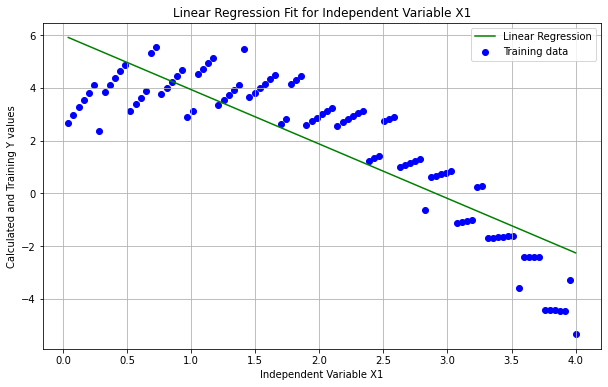

In [17]:
#Independent variable X1
plt.scatter(X1[:,1], Y, color='blue', label = 'Training data')
plt.plot(X1[:,1], X1.dot(thetaX1), color = 'green', label = 'Linear Regression')

plt.grid()
plt.xlabel('Independent Variable X1')
plt.ylabel('Calculated and Training Y values')
plt.title('Linear Regression Fit for Independent Variable X1')
plt.legend()

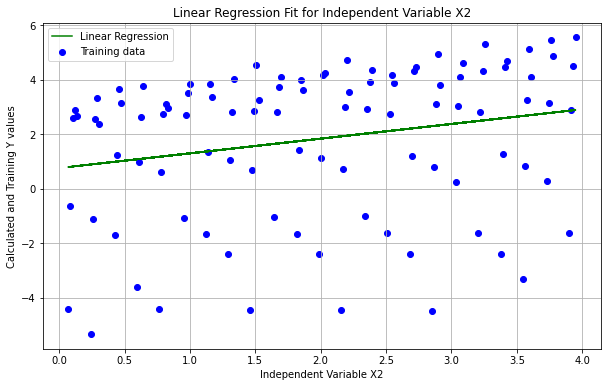

In [18]:
#Independent variable X2
plt.scatter(X2[:,1], Y, color='blue', label = 'Training data')
plt.plot(X2[:,1], X2.dot(thetaX2), color = 'green', label = 'Linear Regression')

plt.grid()
plt.xlabel('Independent Variable X2')
plt.ylabel('Calculated and Training Y values')
plt.title('Linear Regression Fit for Independent Variable X2')
plt.legend()

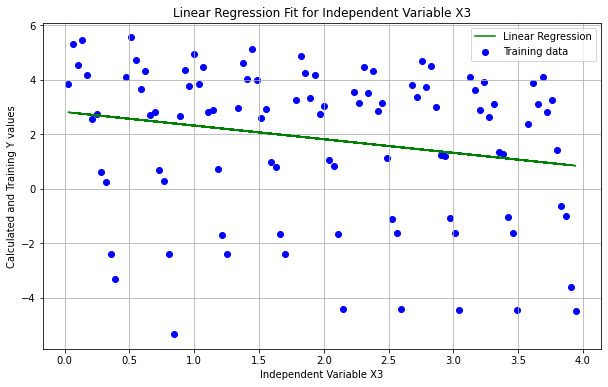

In [19]:
#Independent variable X3
plt.scatter(X3[:,1], Y, color='blue', label = 'Training data')
plt.plot(X3[:,1], X3.dot(thetaX3), color = 'green', label = 'Linear Regression')

plt.grid()
plt.xlabel('Independent Variable X3')
plt.ylabel('Calculated and Training Y values')
plt.title('Linear Regression Fit for Independent Variable X3')
plt.legend()

Next the cost history was plotted over the number of iterations run so far for each X value. The same total number of iterations was used for each.

Text(0.5, 1.0, 'Convergence of gradient descent for Independent Variable X1')

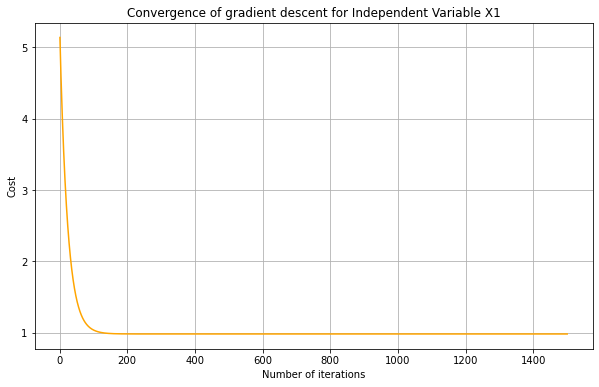

In [20]:
#Independent Variable X1
plt.plot(range(1, iterations + 1), cost_history_X1, color = 'orange')
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.title("Convergence of gradient descent for Independent Variable X1")

Text(0.5, 1.0, 'Convergence of gradient descent for Independent Variable X2')

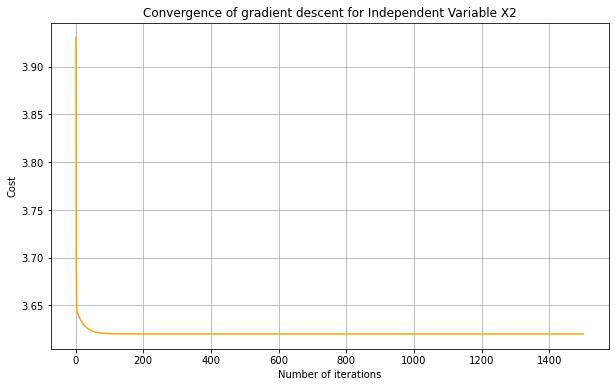

In [21]:
#Independent Variable X2
plt.plot(range(1, iterations + 1), cost_history_X2, color = 'orange')
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.title("Convergence of gradient descent for Independent Variable X2")

Text(0.5, 1.0, 'Convergence of gradient descent for Independent Variable X3')

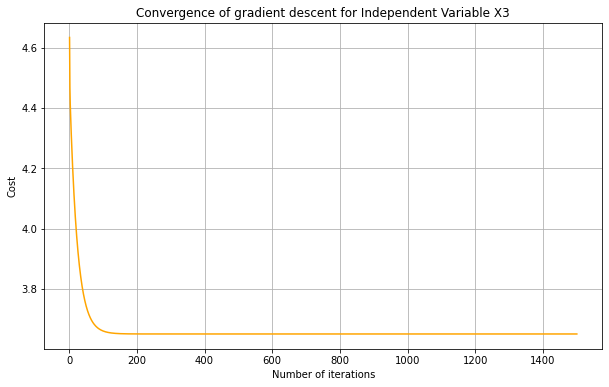

In [22]:
#Independent Variable X3
plt.plot(range(1, iterations + 1), cost_history_X3, color = 'orange')
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.title("Convergence of gradient descent for Independent Variable X3")